<a href="https://colab.research.google.com/github/Tohar-Ts/Machine_learning/blob/ex2/MLex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX 2 logical regression
Tohar Tsvitman

ID: 318192838

FPR:  0.0 

TPR:  0.9444444444444444 

AUC: 0.9732142857142857 




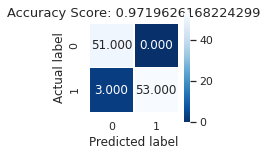

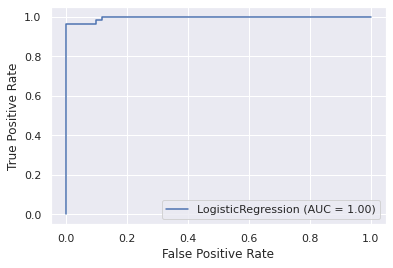

In [ ]:
from sklearn.datasets import load_digits as dig
from sklearn.linear_model import LogisticRegression as lg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import randint
logisticRegr = lg()
digits = dig()

#choose 2 classes:
classA = 9
classB = 8
x = digits.data
y = digits.target
x = x[np.logical_or(y == classB, y == classA)]
y = y[np.logical_or(y == classB, y == classA)]

#split to train and test:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#normlize data:
x_train_normal = StandardScaler().fit_transform(x_train)
x_test_normal = StandardScaler().fit_transform(x_test)

#run logical regression algorithem and try to predict the test data classification
logisticRegr = lg()
logisticRegr.fit(x_train_normal, y_train) # training the model on the training data
predictions = logisticRegr.predict(x_test_normal)

#confussion matrix
score = logisticRegr.score(x_test_normal, y_test)
confussionMatrix = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(2,2))
sns.heatmap(confussionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 13);

#calculate rates ROC curvw and AUC
# fpr, tpr, threshold = metrics.roc_curve(y_test, predictions, pos_label=1)
fpr = (confussionMatrix[0][1]) / (confussionMatrix[0][1] + confussionMatrix[1][1])
tpr = (confussionMatrix[0][0]) / (confussionMatrix[0][0] + confussionMatrix[1][0])
auc = metrics.roc_auc_score(y_test, predictions)
print('FPR: ', fpr, '\n\nTPR: ', tpr, '\n\nAUC:', auc, '\n\n')
metrics.plot_roc_curve(logisticRegr, x_test_normal, y_test)
plt.show()